In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/My Drive/University/FYP/Sentiment Analysis/Sentiment-tagger/corpus/analyzed/saved_models/word2vec_model_skipgram_300

In [3]:
allData = pd.read_csv("/content/drive/My Drive/UNI/FYP/Sentiment Analysis/Sentiment-tagger/corpus/analyzed/comments_tagged_remove_all_punc_keep_question.csv", ";")
trainData, testData = train_test_split(allData, test_size=0.4, random_state=0)
print(trainData.columns.values)

['docid' 'comment' 'label']


In [0]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=lambda text: text.split())
vectorizedTrainComments = vectorizer.fit_transform(trainData["comment"])

logisticRegressionModel = LogisticRegression()
logisticRegressionModel = logisticRegressionModel.fit(vectorizedTrainComments, trainData["label"])

vectorizedTestComments = vectorizer.transform(testData["comment"])
predictions = logisticRegressionModel.predict(vectorizedTestComments)

In [5]:
labelBinarizer = preprocessing.LabelBinarizer()
labelBinarizer.fit(['NEGATIVE', 'POSITIVE'])
testLabels = labelBinarizer.transform(testData["label"])
predictLabels = labelBinarizer.transform(predictions)
print(accuracy_score(testData["label"], predictions))
print(precision_score(testLabels, predictLabels))
print(f1_score(testLabels, predictLabels))

0.8493013972055888
0.8698770491803278
0.849


Predicted  NEGATIVE  POSITIVE
Actual                       
NEGATIVE        853       127
POSITIVE        175       849


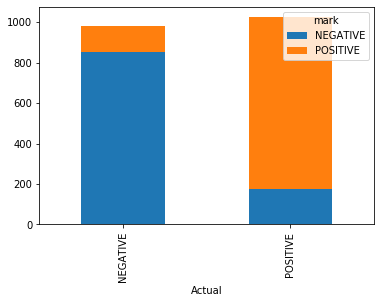

In [6]:
confusionMatrix = pd.crosstab(testData["label"], predictions, rownames=["Actual"], colnames=["Predicted"])
print(confusionMatrix)
confusionMatrix.plot.bar(stacked=True)
plt.legend(title='mark')
# plt.show()

In [0]:
testWords = vectorizer.get_feature_names()

In [0]:
# print(testWords[len(testWords) - 1])
modelCoeffs = logisticRegressionModel.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : testWords, 'Coefficient' : modelCoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
print(coeffdf.tail(10))
print(coeffdf.head(10))
print(coeffdf.loc[coeffdf['Word'] == "උසාවි"])

          Word  Coefficient
10049      මදි    -1.205150
551         අද    -1.214159
1798       ඇයි    -1.218848
998        අයට    -1.267127
10858     මේවා    -1.284851
6023    දඩුවම්    -1.304556
2632       එපා    -1.325931
8821    පිස්සු    -1.359487
1037     අයියෝ    -1.372883
10802  මෙහෙමත්    -1.635931
          Word  Coefficient
15129      හොඳ     2.024599
14274      සුබ     1.793797
13429  සතුටුයි     1.758067
15144   හොඳයි.     1.631952
15119   හොදයි.     1.566272
5229        ජය     1.538383
7429      නියම     1.514366
2851        ඔබ     1.437547
11781  ලැබේවා!     1.366688
11780   ලැබේවා     1.359481
       Word  Coefficient
2453  උසාවි    -0.119041
